# Set up
1) Load the necessary modules for this tutorial
2) Load the GridSamp toolbox and set the path correctly
3) Load the image_region objects using various grids. See the `Grids.ipynb` file for a tutorial on the grids.
4) Optional: manipulate lists of image regions if you want to extract manipulated image regions. See the `image_region.ipynb` file for a tutorial on how to manipulate a (list of) image region(s).

In [1]:
# LOAD MODULES
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
# LOAD IAM

# Change directory to that of IAM to load it
os.chdir(r'C:\Users\u0154823\OneDrive - KU Leuven\Desktop\PhD\0 Preparation\0.2 IAM toolbox\IAM toolbox\source-code\image-aesthetic-map-toolbox')

# Open IAM toolbox
from grid_samp import Node, ImageRegion, Tree
from grid_samp.grids import FixedGrid, RecursiveGrid, ImageRegionBasedGrid
from grid_samp.assemble import ROI, ImageRegionIntersectionHeatmap, Mosaic, Contextualize

# Set environment to current environment
os.chdir("Tutorials")

In [4]:
#------------------------------#
# Generating the image regions #
#------------------------------#

# Load example image
image = 'example img.jpg'
image = Image.open(image)

# Fixed grid image regions
#Image_regions_fixed = Fixed_Grid(image = image, n_col = 15, nrows = 20)

# Recursive grid image regions
tree = Tree(image)
tree.decompose(decomposition = RecursiveGrid, target_level = 4)
Image_regions_recursive = tree.get_level_Image_Regions(target_level = 4)

# Anchor based image regions
x, y, w, h = (40, 750, 120, 120)
Anchor = ImageRegion(x, y, w, h)
Anchor_Based_Image_Regions = ImageRegionBasedGrid.generate(Anchor, image)

# Extracting image regions
GridSamp allows the extraction of individual image regions, either as context-free image regions or as contextualised image regions. A context-free image region is just the image region, in isolation. A contextualized image region is the image region alongside the full image. In contextualized regions, a rectangle can be indicated in the image to demarcate the location of the image, the location of the image region can be chosen.

In [12]:
#----------------------------#
# Context-free image regions #
#----------------------------#

# Select image region from list
Recursive_Grid_Image_Region = Image_regions_recursive[0] 

# Extract image region from image
Recursive_Grid_Image_Region_no_context = Recursive_Grid_Image_Region.extract_from_image(image)

# Save using PIL
Recursive_Grid_Image_Region_no_context.save("context_free_example.png")

In [13]:
#------------------------------#
# Contextualised image regions #
#------------------------------#

# Select image region from list
Recursive_Grid_Image_Region = Image_regions_recursive[0]

# Make contextualised image region
Recursive_Grid_Image_Region_context = Contextualize.generate(image_region = Recursive_Grid_Image_Region, image = image, draw_roi=False, context_position = "right", Image_Region_position = "center")

# Save using PIL
Recursive_Grid_Image_Region_context.save("context_example.png")

# Assembling image regions into mosaic images
GridSamp allow to reassemble a `image_region_list` into a new mosaic stimulus. Each image region of the list reflects a tile in the mosaic. The margin between the tiles can be manipulated using the `margin` command, a random offset on each tile can be introduced along the y-axis (`y_offset_range`) or x-axis (`x_offset_range`), and each tile can be rotated for a random amount of degrees using the `rotate_range` command. 

In [ ]:
#---------------#
# Mosaic images #
#---------------#

### When using fixed grids
#intact_example = Mosaic.generate(image, Image_regions_fixed, margin = 0)
#margin_example = Mosaic.generate(image, Image_regions_fixed, margin = 20)
#x_offs_example = Mosaic.generate(image, Image_regions_fixed, margin = 20, x_offset_range = 15)
#y_offs_example = Mosaic.generate(image, Image_regions_fixed, margin = 20, y_offset_range = 15)

### When using fixed and recursive grids
intact_example = Mosaic.generate(image, Image_regions_recursive, margin = 0)
margin_example = Mosaic.generate(image, Image_regions_recursive, margin = 20)
x_offs_example = Mosaic.generate(image, Image_regions_recursive, margin = 20, x_offset_range = 15)
y_offs_example = Mosaic.generate(image, Image_regions_recursive, margin = 20, y_offset_range = 15)

### When using anchor based grids
intact_example = Mosaic.generate(image, Anchor_Based_Image_Regions, margin = 0)
margin_example = Mosaic.generate(image, Anchor_Based_Image_Regions, margin = 20)
x_offs_example = Mosaic.generate(image, Anchor_Based_Image_Regions, margin = 20, x_offset_range = 15)
y_offs_example = Mosaic.generate(image, Anchor_Based_Image_Regions, margin = 20, y_offset_range = 15)
rotate_example = Mosaic.generate(image, Anchor_Based_Image_Regions, margin = 20, rotate = 5)

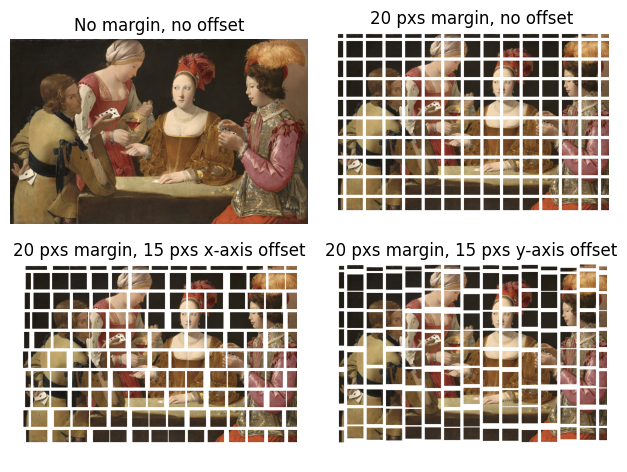

In [15]:
# Plot the original image with ROI
plt.subplot(2, 2, 1)
plt.imshow(intact_example)
plt.title('No margin, no offset')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(margin_example)
plt.title('20 pxs margin, no offset')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(x_offs_example)
plt.title('20 pxs margin, 15 pxs x-axis offset')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(y_offs_example)
plt.title('20 pxs margin, 15 pxs y-axis offset')
plt.axis('off')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()